In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from display_acp import *
import plotly.express as px

In [15]:
df = pd.read_csv("../Linear_regression_projet/data.csv")

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Traitement des données

In [17]:
df["date"] = pd.to_datetime(df["date"])
df["renovation"] = df["date"].dt.year - df['yr_built']
df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
df['renovation'][df['renovation'] < 0] = 0
df["date"] = (df["date"] - df["date"].min()).dt.days
df["ln_price"] = np.log(df["price"])
df["bathrooms"] -= 0.01
df["bath_or_shower"] = round(df["bathrooms"])
df["toilet"] = np.ceil(df["bathrooms"])
df = df[df["bedrooms"]<20] # 1 valeur abérante avec 30 chambres
df = df[df["price"] != 7700000] #Valeur dégradant le modèle

C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_10548/785307995.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_10548/785307995.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Standardisation des données

In [18]:
X = df.drop(["id","yr_renovated","yr_built", "bathrooms"], axis=1)

In [19]:
X.shape

(21611, 21)

In [20]:
X_scaled = StandardScaler().fit_transform(X)

## Modèle

In [21]:
pca = PCA(n_components=20)
projection = pca.fit_transform(X_scaled)

In [22]:
table = pd.DataFrame(projection, index=X.index, columns=["F"+str(i+1) for i in range(20)])
table

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,-3.386514,0.154423,-0.277623,0.681027,0.028769,0.625587,0.200978,-0.024593,-1.179163,0.627673,-0.089130,-0.927820,-0.072234,-0.138609,0.582025,-0.257521,-0.025425,-0.322712,0.167955,0.298224
1,0.380697,0.448198,-1.327710,0.905308,-0.667192,0.946884,-0.220368,0.227609,0.610274,0.038193,0.014198,-0.136457,-0.225207,0.319474,-0.221700,0.048149,0.855796,0.681556,-0.360638,-0.163475
2,-3.528874,-0.322981,0.460343,0.710601,-0.244706,-1.333206,-1.296572,1.130292,-0.603093,0.169404,-0.148743,0.085351,0.339829,-0.116116,-1.820133,1.377466,-0.071582,0.329374,0.311364,0.883633
3,-0.406361,2.347501,0.346958,-2.099368,-0.270767,1.221378,-0.064352,-1.054611,1.640358,-0.591056,0.344777,-0.393789,0.366722,-0.486304,0.464687,-0.323551,-0.367864,0.300840,0.147254,-0.314984
4,-0.421796,-0.736913,-0.146513,0.414101,-0.159001,-0.719510,-1.181797,0.940064,0.085851,0.097991,-0.083330,-0.598100,0.547129,-0.421798,0.691950,-0.341869,-0.117576,-0.353739,0.241847,-0.194847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.050743,-0.758595,-2.538612,1.452387,-0.364087,0.860607,1.808389,-0.274248,1.160519,-0.337843,-0.344216,0.654761,-0.891472,0.149170,-0.494313,0.351454,0.014845,-0.163807,0.150803,0.313298
21609,0.533114,-0.575375,-1.650527,0.593529,0.142669,1.743058,-0.696159,-0.959243,-0.125133,0.279361,0.058546,-0.334231,-0.475450,-0.765931,0.259807,-0.107653,0.216111,0.253326,-0.229196,-0.054643
21610,-2.645382,-0.298340,-1.480174,1.905382,-0.053308,0.211493,1.328680,0.356370,0.157065,-0.616997,0.141757,0.001071,-1.097561,-0.000307,0.817049,-0.537396,0.068035,0.498094,0.529426,-0.215475
21611,-0.044912,-1.897162,-1.087411,0.235388,0.482699,-0.239186,-0.637902,0.372315,1.006449,-0.383828,-0.215639,0.359089,-0.051684,0.258642,0.346681,-0.173685,-0.048007,-0.507755,-0.193870,0.005409


## Détermination du nombre de components

On cherche à obtenir un seuil de 99%

**The Hardway**

In [23]:
components = 1
pca = PCA(n_components=components).fit(X_scaled)
exp_variance = pca.explained_variance_ratio_
while exp_variance.sum() <= 0.99:
    components += 1
    pca = PCA(n_components=components).fit(X_scaled)
    exp_variance = pca.explained_variance_ratio_
components

18

**Classical Way**

In [24]:
pca = PCA(n_components=0.99).fit(X_scaled)

## Eboullis des valeurs propres

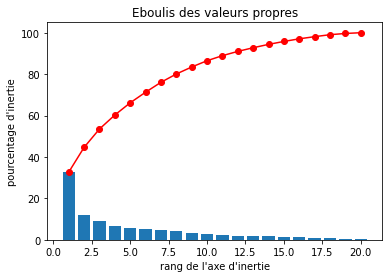

In [25]:
display_scree_plot(PCA(20).fit(X_scaled))

## Cercle des corrélations

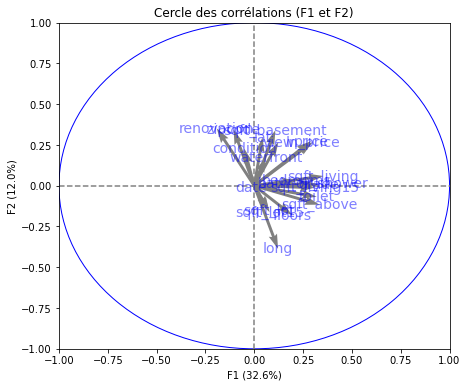

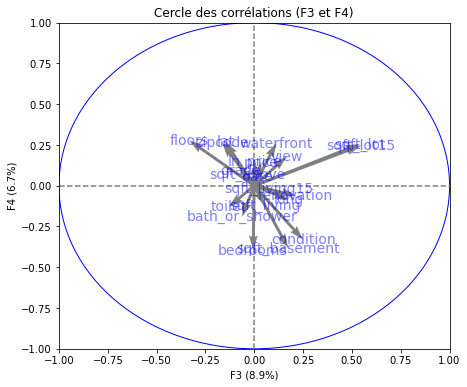

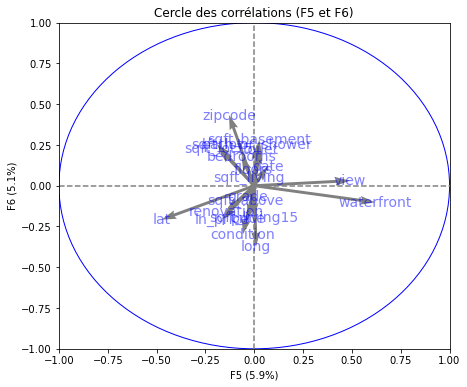

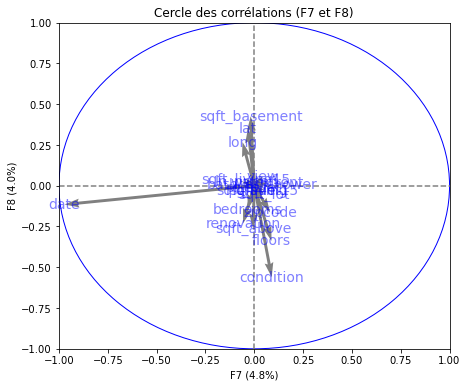

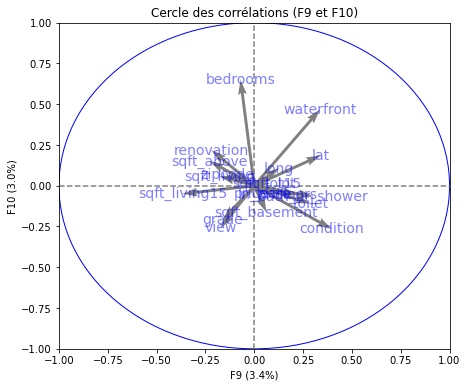

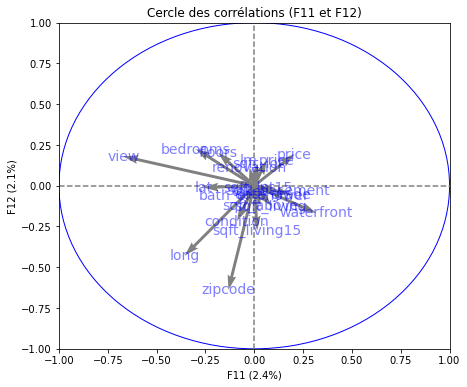

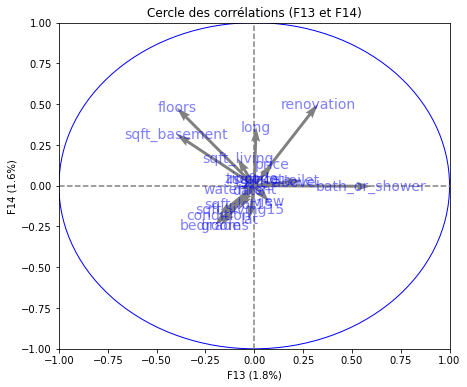

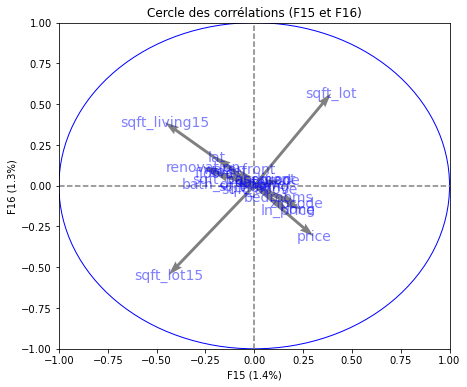

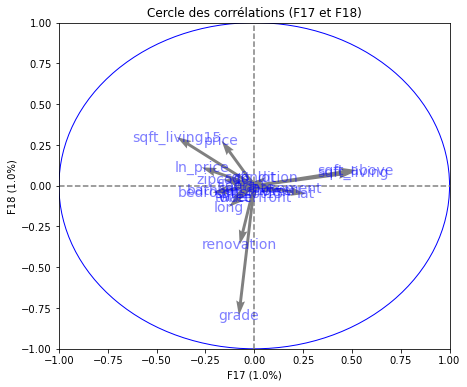

In [26]:
pcs = pca.components_
display_circles(pcs, len(X.columns), pca, [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11),(12,13),(14,15),(16,17)],np.array(X.columns))

## Projection des individus

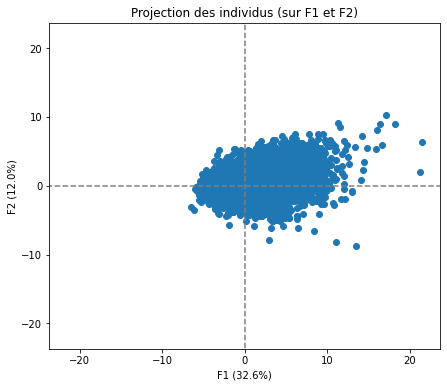

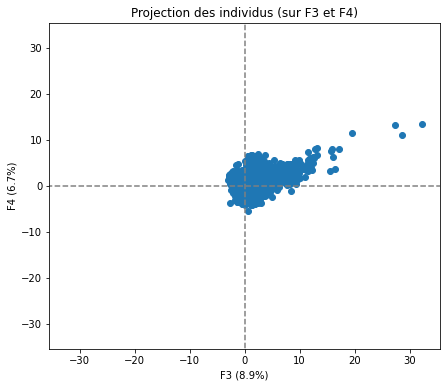

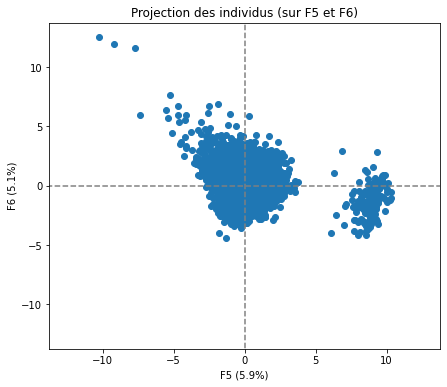

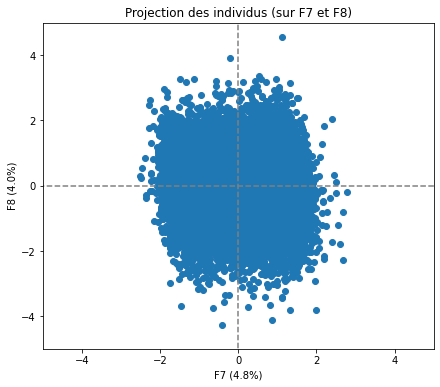

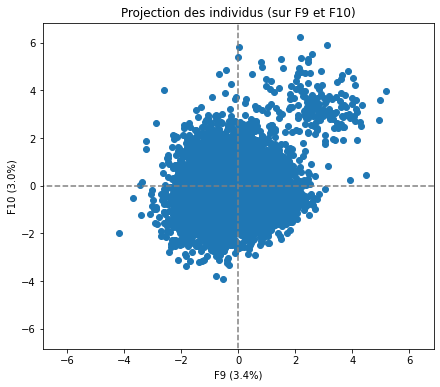

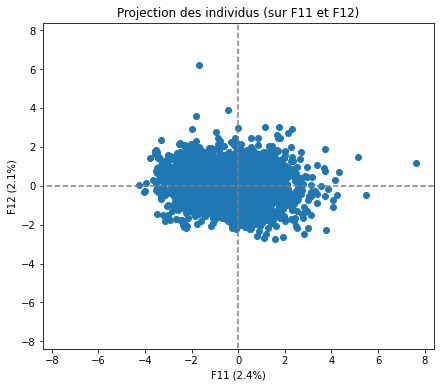

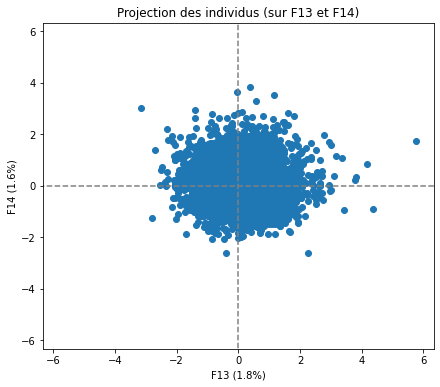

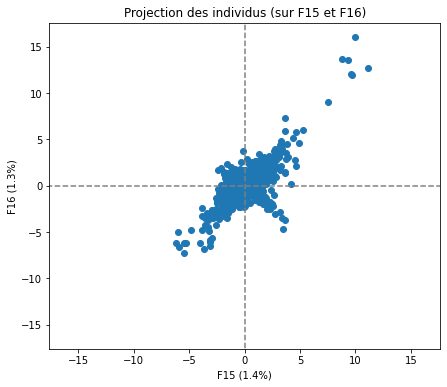

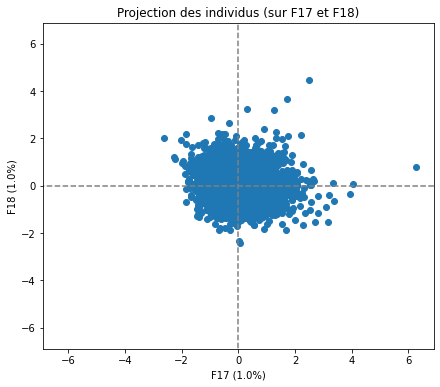

In [27]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, components, pca, [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11),(12,13),(14,15),(16,17)])

## Ajout d'un Polynomial Feature

### Pipeline

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [51]:
columns = list(df.drop(["price","ln_price","id","yr_renovated","yr_built", "bathrooms"],axis=1).columns)
pipeline = make_pipeline(PolynomialFeatures(2), StandardScaler())
processor = make_column_transformer((pipeline, columns))

In [52]:
pca = make_pipeline(processor, PCA(n_components=0.99), LinearRegression())

In [53]:
from sklearn.model_selection import train_test_split, learning_curve

In [54]:
X = df.drop(["price", "ln_price", "id","yr_renovated","yr_built", "bathrooms"], axis=1)
y = df["ln_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
model = pca.fit(X_train, y_train)
train_size, train_score, val_score = learning_curve(model, X_train, y_train,train_sizes=np.linspace(0.1,1,100), cv=5,
                                                    shuffle=True, scoring='r2')
pred = pca.predict(X_test)

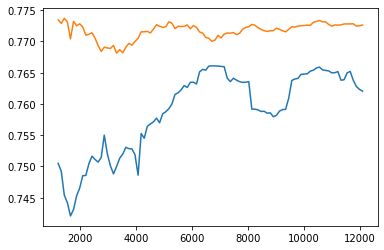

In [56]:
plt.plot(train_size, val_score.mean(axis=1), label="Validation")
plt.plot(train_size, train_score.mean(axis=1), label="train")

In [57]:
fig = px.scatter(y=np.exp(y_test), x=np.exp(pred),trendline="ols",
                 labels={"y": "Valeurs réelles", "x": "Valeurs prédites"},
                 title="Précision du modèle Ridge")
fig.show()

C:\Users\Apprenant\anaconda3\envs\rb_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\Apprenant\anaconda3\envs\rb_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

